Ouverture du fichier Excel

**Partie 1 : Préparation et Nettoyage des données.**

In [ ]:
import pandas as pd
import numpy as np

# Importation fichier production

df = pd.read_excel('/content/drive/MyDrive/bdd_projet11.xlsx')
print(df.head())

# Je supprime les pays sans performance logistique
df = df.loc[df['performance_logistique_2022']>0]
# Je choisis de supprimer les données où il n'y a pas de performance logistique
# (soit donnée manquante, soit perf à 0 mais dans ce cas là le pays ne sera pas une cible)
df = df.loc[df['PIB_2023']>0]
# Je supprime les pays sans PIB (peu probable, et si pas de PIB ça va être compliqué d'acheter nos poulets)
df = df.loc[df['Import_viande_from_france_$_2022']>0]
# Soit pas de donnée, soit peu probable qu'on puisse commercialiser facilement dans ces pays

df.describe()
# Pour taux_import, Il y a beaucoup de Nan => Surement 0. C'est intéressant comme pays s'il n'y a pas de taxe pour qu'on exporte chez eux.
# Le describe permet de voir les valeurs max

             Pays  prod_viande_2022(t)  import_viande_2022(t)  \
0     Afghanistan             28790.74                6902.31   
1  Afrique du Sud           1951000.00              290742.62   
2         Albanie             16335.57               43124.46   
3         Algérie            274862.81                    NaN   
4       Allemagne           1076000.00              494001.70   

   Import_viande_from_france_$_2022    pop_2022    pop_2023  Taxes_imp  \
0                      1.680464e+07  40578842.0  41454761.0        NaN   
1                      1.849396e+08  62378410.0  63212384.0   0.803496   
2                      2.746071e+07   2777689.0   2745972.0        NaN   
3                      1.791302e+08  45477389.0  46164219.0        NaN   
4                      4.061486e+09  83797985.0  83280000.0        NaN   

   stab_politique      PIB_2022      PIB_2023  performance_logistique_2022  
0       -2.484081  1.449724e+10  1.723305e+10                          2.0  
1       -0

,prod_viande_2022(t),import_viande_2022(t),Import_viande_from_france_$_2022,pop_2022,pop_2023,Taxes_imp,stab_politique,PIB_2022,PIB_2023,performance_logistique_2022
count,1.080000e+02,1.070000e+02,1.090000e+02,1.090000e+02,1.090000e+02,59.000000,109.000000,1.090000e+02,1.090000e+02,109.000000
mean,9.945061e+05,1.631759e+05,3.685243e+08,5.433238e+07,5.465804e+07,13.166712,-0.047511,8.212156e+11,8.571350e+11,3.077982
std,2.825011e+06,3.878328e+05,9.822035e+08,1.946068e+08,1.953853e+08,15.031244,0.895533,3.064072e+12,3.199289e+12,0.639061
min,0.000000e+00,-7.910400e+04,3.932000e+04,9.284000e+04,9.331600e+04,0.000000,-2.729136,1.224578e+09,1.316733e+09,1.800000
25%,2.377500e+04,5.866060e+03,1.254567e+07,3.204802e+06,3.185073e+06,3.770308,-0.508541,1.951351e+10,2.066179e+10,2.600000
50%,1.175174e+05,3.759523e+04,4.526686e+07,1.020317e+07,1.040559e+07,8.973774,0.108091,7.426336e+10,8.482465e+10,3.000000
75%,5.880128e+05,9.924227e+04,1.714962e+08,3.347544e+07,3.384562e+07,17.401290,0.660534,4.601317e+11,4.374153e+11,3.600000
max,1.959921e+07,2.690560e+06,6.125358e+09,1.425423e+09,1.438070e+09,94.044860,1.358570,2.600689e+13,2.772071e+13,4.300000


In [ ]:
# Vérification des doublons

df.loc[df['Pays'].duplicated(keep=False)]
df.describe()
# Même nombre de pays, donc pas de doublon.
# Nous avons toujours plus de 100 pays dans notre analyse.

,prod_viande_2022(t),import_viande_2022(t),Import_viande_from_france_$_2022,pop_2022,pop_2023,Taxes_imp,stab_politique,PIB_2022,PIB_2023,performance_logistique_2022
count,1.080000e+02,1.070000e+02,1.090000e+02,1.090000e+02,1.090000e+02,59.000000,109.000000,1.090000e+02,1.090000e+02,109.000000
mean,9.945061e+05,1.631759e+05,3.685243e+08,5.433238e+07,5.465804e+07,13.166712,-0.047511,8.212156e+11,8.571350e+11,3.077982
std,2.825011e+06,3.878328e+05,9.822035e+08,1.946068e+08,1.953853e+08,15.031244,0.895533,3.064072e+12,3.199289e+12,0.639061
min,0.000000e+00,-7.910400e+04,3.932000e+04,9.284000e+04,9.331600e+04,0.000000,-2.729136,1.224578e+09,1.316733e+09,1.800000
25%,2.377500e+04,5.866060e+03,1.254567e+07,3.204802e+06,3.185073e+06,3.770308,-0.508541,1.951351e+10,2.066179e+10,2.600000
50%,1.175174e+05,3.759523e+04,4.526686e+07,1.020317e+07,1.040559e+07,8.973774,0.108091,7.426336e+10,8.482465e+10,3.000000
75%,5.880128e+05,9.924227e+04,1.714962e+08,3.347544e+07,3.384562e+07,17.401290,0.660534,4.601317e+11,4.374153e+11,3.600000
max,1.959921e+07,2.690560e+06,6.125358e+09,1.425423e+09,1.438070e+09,94.044860,1.358570,2.600689e+13,2.772071e+13,4.300000


In [ ]:
# Liste des variables numériques
variables = [
    'prod_viande_2022(t)', 'import_viande_2022(t)', 'Import_viande_from_france_$_2022',
    'pop_2022', 'pop_2023', 'Taxes_imp', 'stab_politique',
    'PIB_2022', 'PIB_2023', 'performance_logistique_2022'
]

# Détection d'outliers par la méthode IQR
outliers = {}
for var in variables:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[var] = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]

# Afficher les variables avec outliers détectés
for var, values in outliers.items():
    if not values.empty:
        print(f"⚠️ Outliers trouvés pour '{var}' :")
        print(values)
        print("\n")


⚠️ Outliers trouvés pour 'prod_viande_2022(t)' :
1       1951000.00
8       2319000.00
23     14524000.00
34     14998714.37
40      1820126.00
70      4906817.03
71      4040989.00
79      2371643.00
95      1607791.19
103     3781735.28
126     1437322.32
127     2231610.00
130     1801776.29
133     1815000.00
134     5308201.00
135     2525379.00
165     1837587.80
174    19599212.00
Name: prod_viande_2022(t), dtype: float64


⚠️ Outliers trouvés pour 'import_viande_2022(t)' :
1       290742.62
4       494001.70
5       308122.71
7       513695.66
34     1757302.49
55     1067818.00
79      574508.73
103    1047430.73
125     619335.69
126     342864.09
133     444974.18
137    1522027.00
154    2690560.00
182    1177725.00
184     615447.94
Name: import_viande_2022(t), dtype: float64


⚠️ Outliers trouvés pour 'Import_viande_from_france_$_2022' :
4      4.061486e+09
10     5.182571e+08
17     4.091363e+09
32     9.328179e+08
34     1.976451e+09
47     4.597194e+08
51     2.685073e

In [ ]:
# Commentaires pour les Outliers :
# On retrouve les mêmes pays en 2022 et 2023 pour le PIB et la population. De plus source fiable.
# On sait aussi que certains pays sont nettement plus peuplés que la majorité des pays (Inde, Chine ...)
# On sait également que certains pays sont nettement plus riches que la majorité des pays (PIB)
# Donc pour PIB et Population je pense qu'on peut accepter les outliers

# Pour stabilité politique, les pays concernés sont des pays avec des complications politiques (conflits ...) justifiant des faibles indices de stabilité politique.

# Pour les taxes, le plus gros outlier est l'inde. Après avoir fait une recherche sur l'Inde, ils ont mis des taxes importantes
#  sur certains produits alimentaires, jusqu'à 300% (huiles). L'outlier est donc possible.

# Pour import, import depuis la france et production, il y a beaucoup de pays en Outliers. Sachant que plusieurs variables peuvent expliquer ces importations importantes
# par rapport aux autres pays (plus de richesse, plus d'habitant etc ...) donc on peut également accepter les outliers ici.



In [ ]:
# Transformation des NaN par 0
df.fillna(0, inplace=True)
display(df.head())

,Pays,prod_viande_2022(t),import_viande_2022(t),Import_viande_from_france_$_2022,pop_2022,pop_2023,Taxes_imp,stab_politique,PIB_2022,PIB_2023,performance_logistique_2022
0,Afghanistan,28790.74,6902.31,1.680464e+07,40578842.0,41454761.0,0.000000,-2.484081,1.449724e+10,1.723305e+10,2.0
1,Afrique du Sud,1951000.00,290742.62,1.849396e+08,62378410.0,63212384.0,0.803496,-0.665642,4.069200e+11,3.806993e+11,3.8
2,Albanie,16335.57,43124.46,2.746071e+07,2777689.0,2745972.0,0.000000,0.183349,1.901724e+10,2.354718e+10,2.3
3,Algérie,274862.81,0.00,1.791302e+08,45477389.0,46164219.0,0.000000,-0.577885,2.256385e+11,2.476262e+11,2.2
4,Allemagne,1076000.00,494001.70,4.061486e+09,83797985.0,83280000.0,0.000000,0.586989,4.163596e+12,4.525704e+12,4.2


In [ ]:
# Création des 3 feature engineering

# Première feature : Croissance du PIB

df['croissance_PIB'] = (df['PIB_2023'] - df['PIB_2022']) / df['PIB_2022']

# Deuxième feature : Croissance de la population

df['croissance_pop'] = (df['pop_2023'] - df['pop_2022']) / df['pop_2022']

# Troisième feature : PIB par habitant

df['PIB_par_habitant'] = df['PIB_2023'] / df['pop_2023']

display(df.head())

# On ote Inde, Etats-Unis et Chine qui sont très différents des autres pays et qui écrase les autres groupes (présent dans un autre groupe)
# Cette suppression fait suite à une première ACP qui faisait trop ressortir ces 3 pays.
df = df.loc[~df['Pays'].isin(['Inde', 'USA', 'Chine'])]


,Pays,prod_viande_2022(t),import_viande_2022(t),Import_viande_from_france_$_2022,pop_2022,pop_2023,Taxes_imp,stab_politique,PIB_2022,PIB_2023,performance_logistique_2022,croissance_PIB,croissance_pop,PIB_par_habitant
0,Afghanistan,28790.74,6902.31,1.680464e+07,40578842.0,41454761.0,0.000000,-2.484081,1.449724e+10,1.723305e+10,2.0,0.188712,0.021586,415.707417
1,Afrique du Sud,1951000.00,290742.62,1.849396e+08,62378410.0,63212384.0,0.803496,-0.665642,4.069200e+11,3.806993e+11,3.8,-0.064437,0.013370,6022.542542
2,Albanie,16335.57,43124.46,2.746071e+07,2777689.0,2745972.0,0.000000,0.183349,1.901724e+10,2.354718e+10,2.3,0.238202,-0.011418,8575.171134
3,Algérie,274862.81,0.00,1.791302e+08,45477389.0,46164219.0,0.000000,-0.577885,2.256385e+11,2.476262e+11,2.2,0.097447,0.015103,5364.027950
4,Allemagne,1076000.00,494001.70,4.061486e+09,83797985.0,83280000.0,0.000000,0.586989,4.163596e+12,4.525704e+12,4.2,0.086970,-0.006181,54343.226508


**Partie 2 : Démarrage de l'ACP**

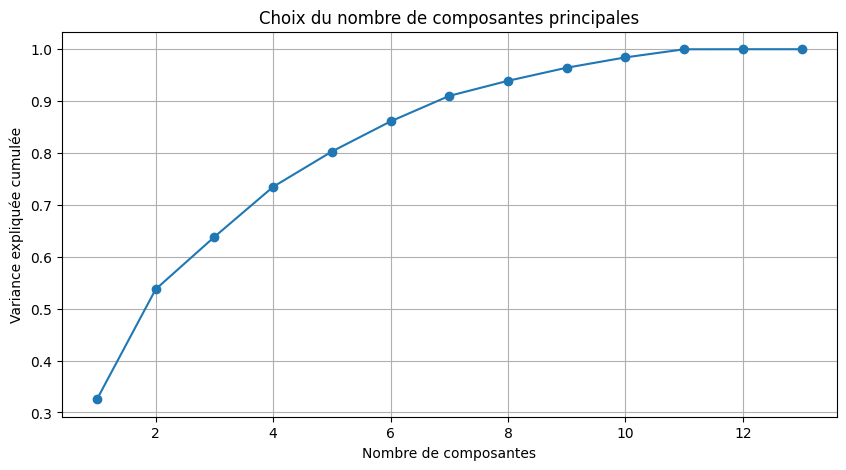

array([3.25395009e-01, 2.12035525e-01, 1.00885543e-01, 9.64821888e-02,
       6.79917652e-02, 5.81185329e-02, 4.91614244e-02, 2.90737766e-02,
       2.51975364e-02, 1.99078954e-02, 1.56123369e-02, 1.36595774e-04,
       1.87130071e-06])

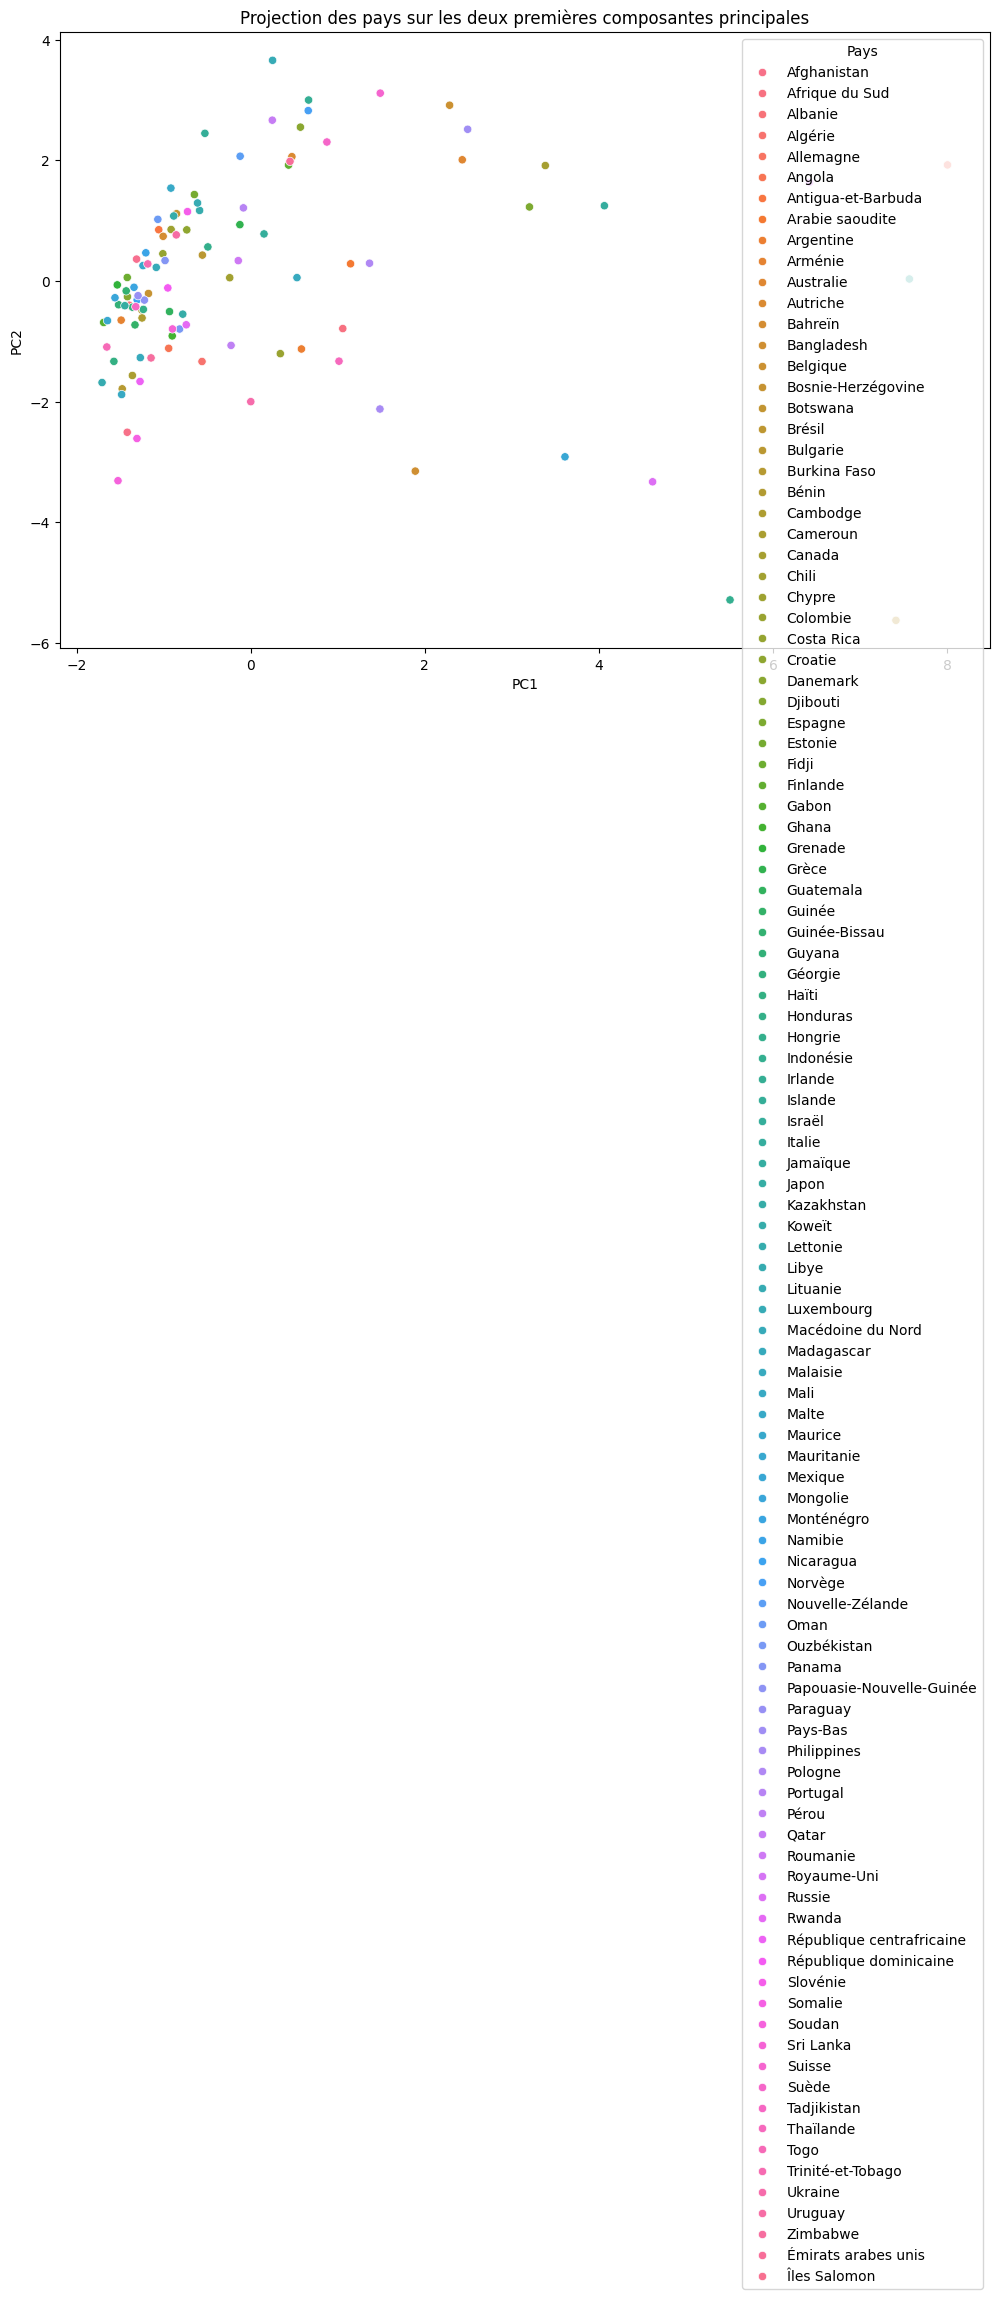

In [ ]:
# Démarrage de l'ACP

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop(columns=['Pays'])  # Création du DF X avec suppression de Pays (colonne non numérique)
X_scaled = StandardScaler().fit_transform(X) # On "fit" et "entraine" = Centré réduire ou standardise nos données

# On applique l'ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Choix du nombre de composantes principales')
plt.grid(True)
plt.show()

display(pca.explained_variance_ratio_)

pca_df = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['Pays'] = df['Pays'].values

plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Pays')
plt.title('Projection des pays sur les deux premières composantes principales')
plt.show()





In [ ]:
# Pour sélectionner le nombre de composantes, on peut employer le critère de Kaiser.
# Nous avons 8 dimensions indépendantes : Les 3 featuring sont des dimensions dépendantes
# PIB et Population sur 2 années sont également dépendants entre les deux années.

# Donc critère de Kaiser => 100/p => 100/8 => 12,5.
# La troisième composante représente - de 12,5% donc selon le critère de Kaiser, on ne retiendrait que les 2 premières composantes.

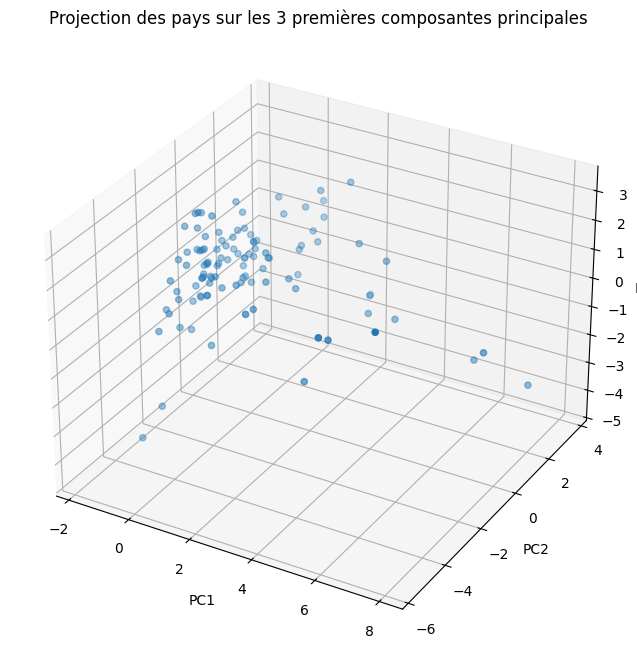

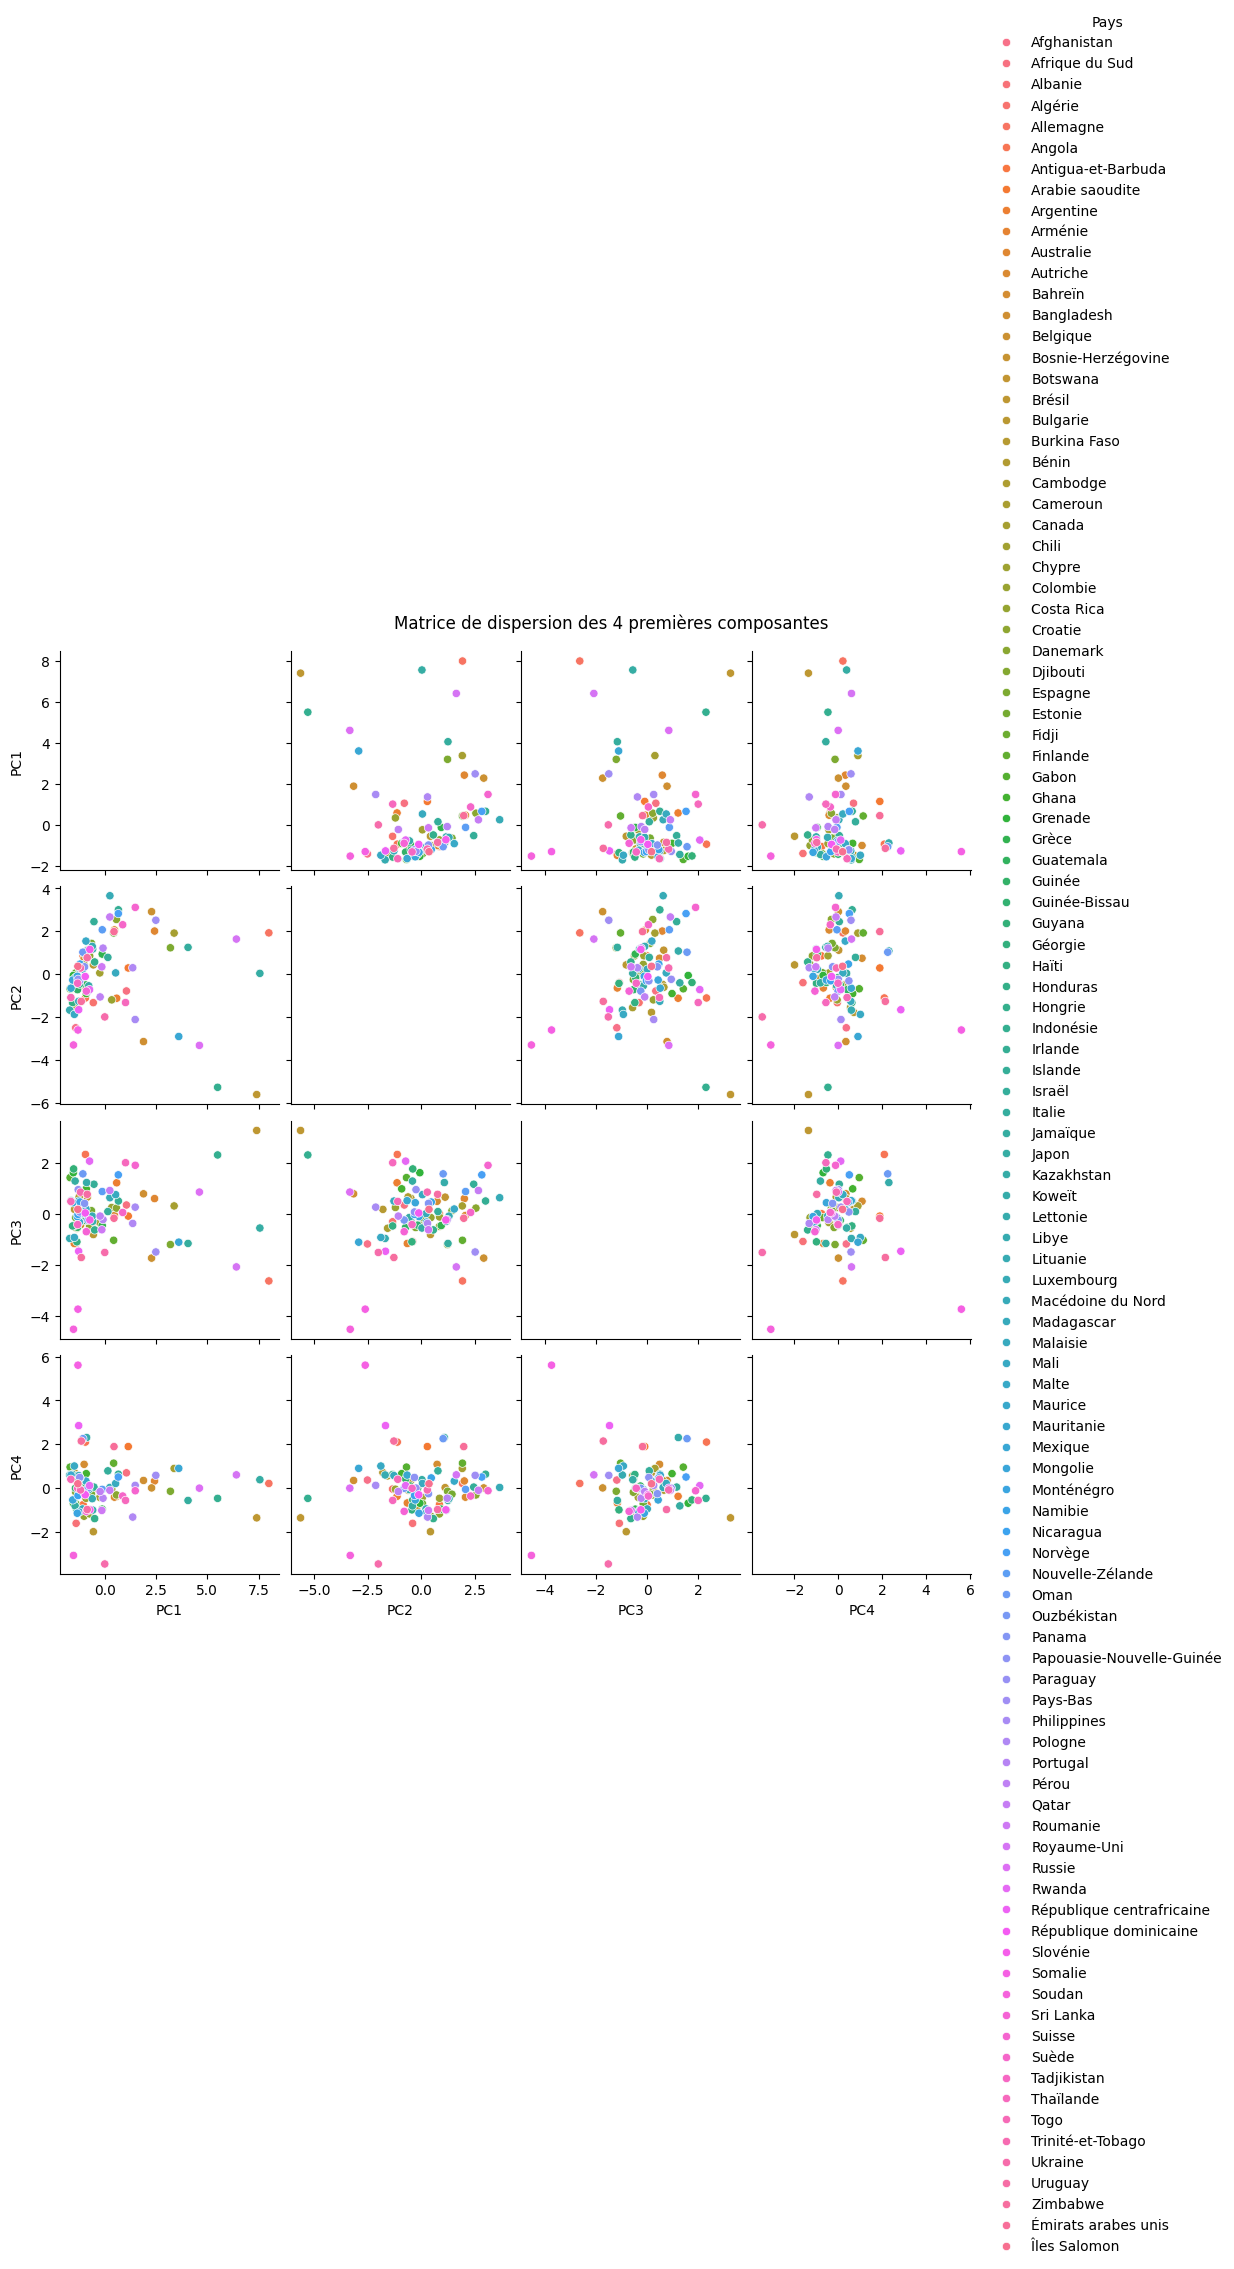

In [ ]:
# Il s'avère tout de même que 2 critères n'expliquent que 55% des variables.
# 75% serait expliqué par 4 composantes, je vais donc essayer de visualiser 4 composantes pour voir ce que ça donne.

X_pca_4 = X_pca[:, :4]

pca_df_4 = pd.DataFrame(X_pca_4, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df_4['Pays'] = df['Pays'].values

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_4['PC1'], pca_df_4['PC2'], pca_df_4['PC3'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Projection des pays sur les 3 premières composantes principales')
plt.show()

sns.pairplot(pca_df_4, vars=['PC1', 'PC2', 'PC3', 'PC4'], hue='Pays')
plt.suptitle("Matrice de dispersion des 4 premières composantes", y=1.02)
plt.show()

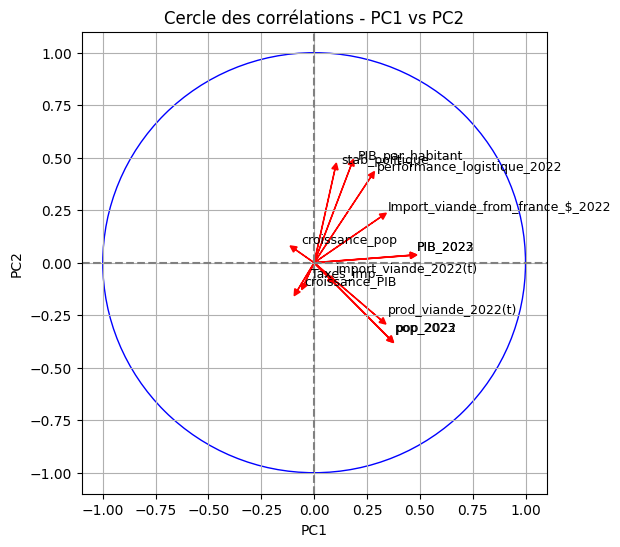

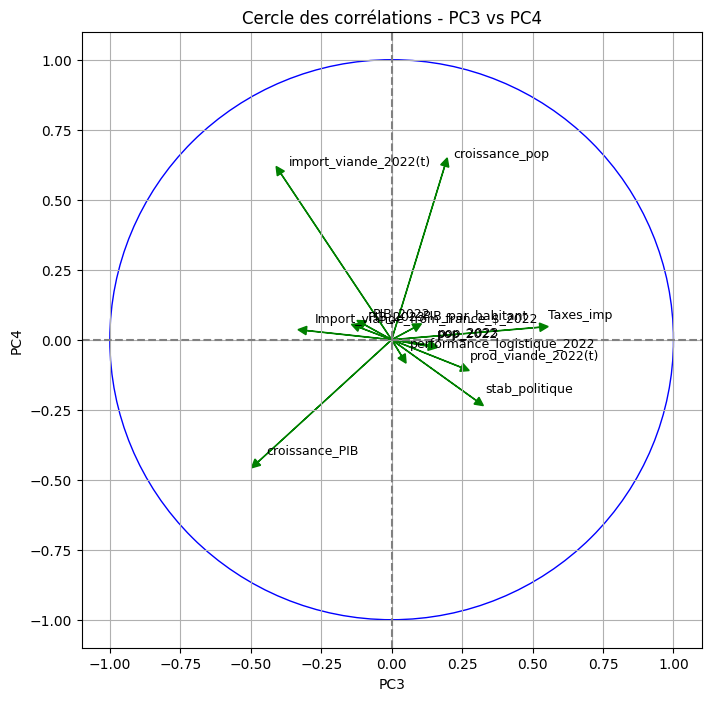

In [ ]:
components = pca.components_[:4]  # Les 4 premières composantes
features = X.columns

# On calcule les corrélations (les coefficients de composantes multipliés par les écarts types)
correlations = components.T

plt.figure(figsize=(6, 6))
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Cercle unité
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)

for i, var in enumerate(features):
    x = correlations[i, 0]
    y = correlations[i, 1]
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, fc='r', ec='r')
    plt.text(x + 0.03, y + 0.03, var, fontsize=9)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle des corrélations - PC1 vs PC2')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

plt.figure(figsize=(8, 8))
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)

for i, var in enumerate(features):
    x = correlations[i, 2]  # PC3
    y = correlations[i, 3]  # PC4
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, fc='g', ec='g')
    plt.text(x + 0.03, y + 0.03, var, fontsize=9)

plt.xlabel('PC3')
plt.ylabel('PC4')
plt.title('Cercle des corrélations - PC3 vs PC4')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

In [ ]:
# Analyse des composantes 3 et 4 :
# PC3 : Montre une correlation entre Taxes importations et Stabilité politique. Dans mon analyse, ça ne me semble pas forcément intéressant.
# Si la PC3 augmente, j'ai un facteur positif pour nous qui augmente aussi (stabilité politique) et un facteur négatif (Taux imp)

# Pour PC4, On explique + de 50% de l'importation de viande et de la croissance de la population. Ce qui semble important. Cependant, cette composante implique
# également une croissance du pib plus faible.

In [ ]:
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(pca.components_))],
                        index=X.columns)
print(loadings)


                                       PC1       PC2       PC3       PC4  \
prod_viande_2022(t)               0.316799 -0.272714  0.247283 -0.098894   
import_viande_2022(t)             0.073148 -0.073766 -0.393326  0.593793   
Import_viande_from_france_$_2022  0.316805  0.218963 -0.302420  0.032771   
pop_2022                          0.354753 -0.358429  0.130979 -0.023210   
pop_2023                          0.353671 -0.358753  0.132261 -0.018732   
Taxes_imp                        -0.046374 -0.100965  0.525498  0.044524   
stab_politique                    0.098396  0.445090  0.301089 -0.217751   
PIB_2022                          0.454165  0.035551 -0.096994  0.054181   
PIB_2023                          0.455994  0.034862 -0.114732  0.044175   
performance_logistique_2022       0.268623  0.409259  0.035457 -0.057955   
croissance_PIB                   -0.078994 -0.131314 -0.475006 -0.437225   
croissance_pop                   -0.089180  0.062884  0.188408  0.620508   
PIB_par_habi

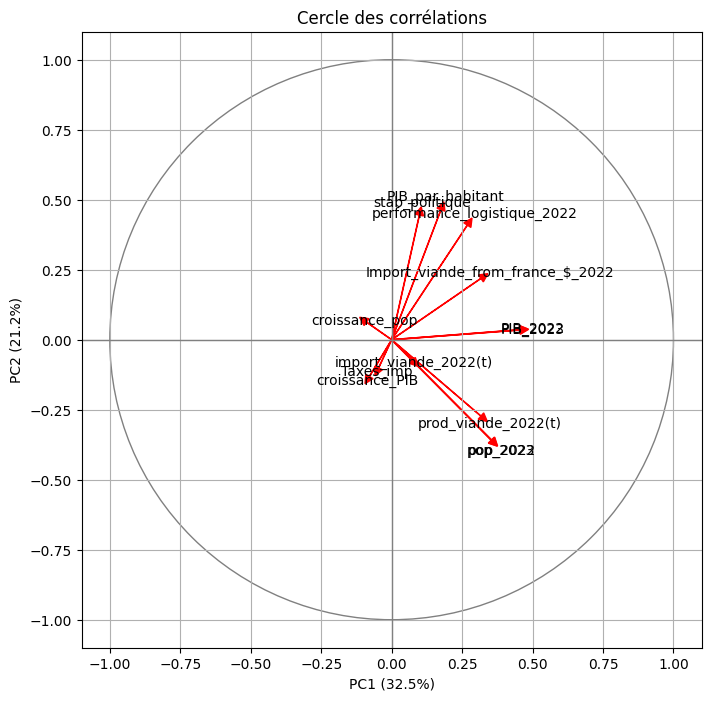

In [ ]:
# Coordonnées des variables dans le plan des composantes
pcs = pca.components_[:2, :]  # composantes 1 et 2
variable_names = df.drop(columns=['Pays']).columns  # ou ajuste le nom

# Cercle unité pour le fond
circle = plt.Circle((0, 0), 1, color='gray', fill=False)

fig, ax = plt.subplots(figsize=(8, 8))
ax.add_artist(circle)

# Flèches pour chaque variable
for i, (x, y) in enumerate(zip(pcs[0], pcs[1])):
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, color='red')
    plt.text(x * 1.1, y * 1.1, variable_names[i], ha='center', va='center', fontsize=10)

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('PC1 (%.1f%%)' % (pca.explained_variance_ratio_[0] * 100))
plt.ylabel('PC2 (%.1f%%)' % (pca.explained_variance_ratio_[1] * 100))
plt.title('Cercle des corrélations')
plt.grid()
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()


In [ ]:
# Interprétations :
# PC1 : On pourrait l'apparenter à la taille du Pays (potentiel taille de marché)
  # + : Import viandes, PIB, prod viande, population
  # - : Croissance population
# PC2 : On pourrait l'apparenter au développement du pays.
  # + : PIB / habitant, performance logistique, stabilité politique
  # - : Croissance PIB, taxes imposables


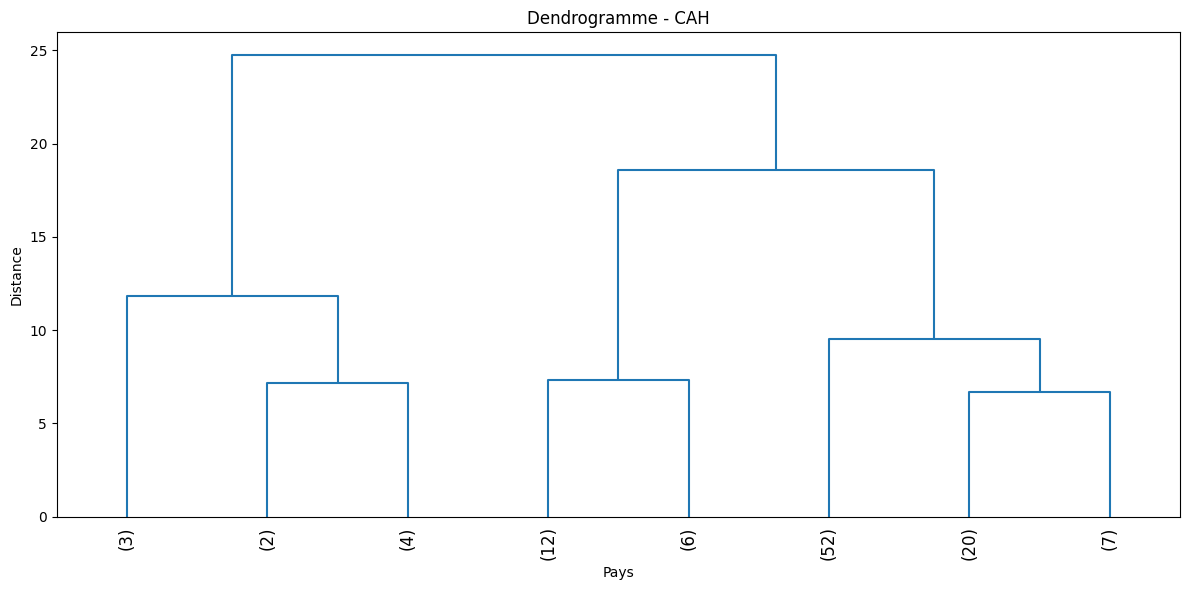

In [ ]:
# Clustering : réalisation de la CAH (Classification Ascendante Hierarchique)
# Info, j'ai regardé plus loin le nombre idéal de cluster. J'avais un coude en 8 + Souhait d'avoir des "petits groupes", j'ai retenu 8.
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

X_cah = X_pca[:, :2]
Z = linkage(X_cah, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z, p=8, truncate_mode='lastp', labels=df['Pays'].values, leaf_rotation=90, color_threshold=0)
plt.title('Dendrogramme - CAH')
plt.xlabel('Pays')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()



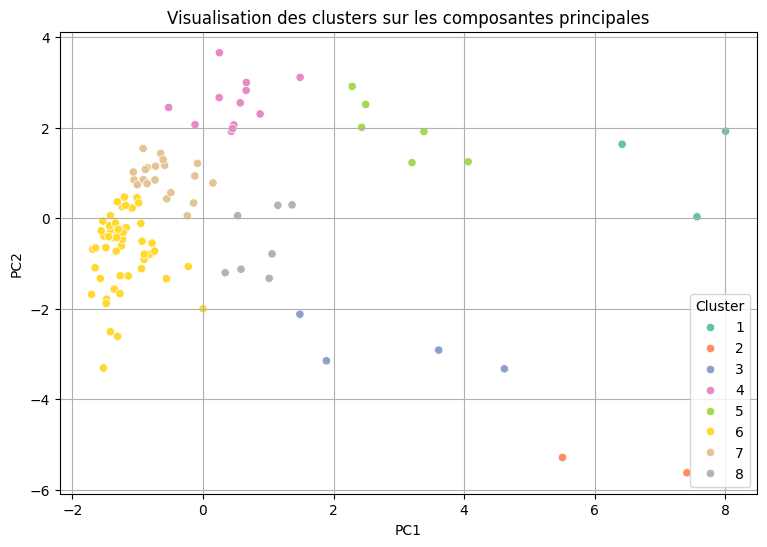

In [ ]:
n_clusters = 8
labels = fcluster(Z, n_clusters, criterion='maxclust')
df['Cluster'] = labels  # Ajout au DataFrame original

# Reconstituer un DataFrame avec PC1 et PC2
pca_df = pd.DataFrame(X_cah, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels
pca_df['Pays'] = df['Pays'].values

plt.figure(figsize=(9, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('Visualisation des clusters sur les composantes principales')
plt.grid()
plt.show()


In [ ]:
groupedcluster = df.groupby('Cluster')['Pays'].apply(list)
for cluster_id, pays_liste in groupedcluster.items():
    print(f"\nCluster {cluster_id} :")
    for pays in pays_liste:
        print("  -", pays)


Cluster 1 :
  - Allemagne
  - Japon
  - Royaume-Uni

Cluster 2 :
  - Brésil
  - Indonésie

Cluster 3 :
  - Bangladesh
  - Mexique
  - Philippines
  - Russie

Cluster 4 :
  - Autriche
  - Danemark
  - Finlande
  - Irlande
  - Islande
  - Luxembourg
  - Norvège
  - Nouvelle-Zélande
  - Qatar
  - Suisse
  - Suède
  - Émirats arabes unis

Cluster 5 :
  - Australie
  - Belgique
  - Canada
  - Espagne
  - Italie
  - Pays-Bas

Cluster 6 :
  - Afghanistan
  - Albanie
  - Algérie
  - Angola
  - Arménie
  - Bosnie-Herzégovine
  - Burkina Faso
  - Bénin
  - Cambodge
  - Cameroun
  - Costa Rica
  - Djibouti
  - Fidji
  - Gabon
  - Ghana
  - Grenade
  - Guatemala
  - Guinée
  - Guinée-Bissau
  - Guyana
  - Géorgie
  - Haïti
  - Honduras
  - Jamaïque
  - Kazakhstan
  - Libye
  - Macédoine du Nord
  - Madagascar
  - Mali
  - Maurice
  - Mauritanie
  - Mongolie
  - Monténégro
  - Namibie
  - Nicaragua
  - Ouzbékistan
  - Panama
  - Papouasie-Nouvelle-Guinée
  - Paraguay
  - Pérou
  - Rwanda
  - Répub

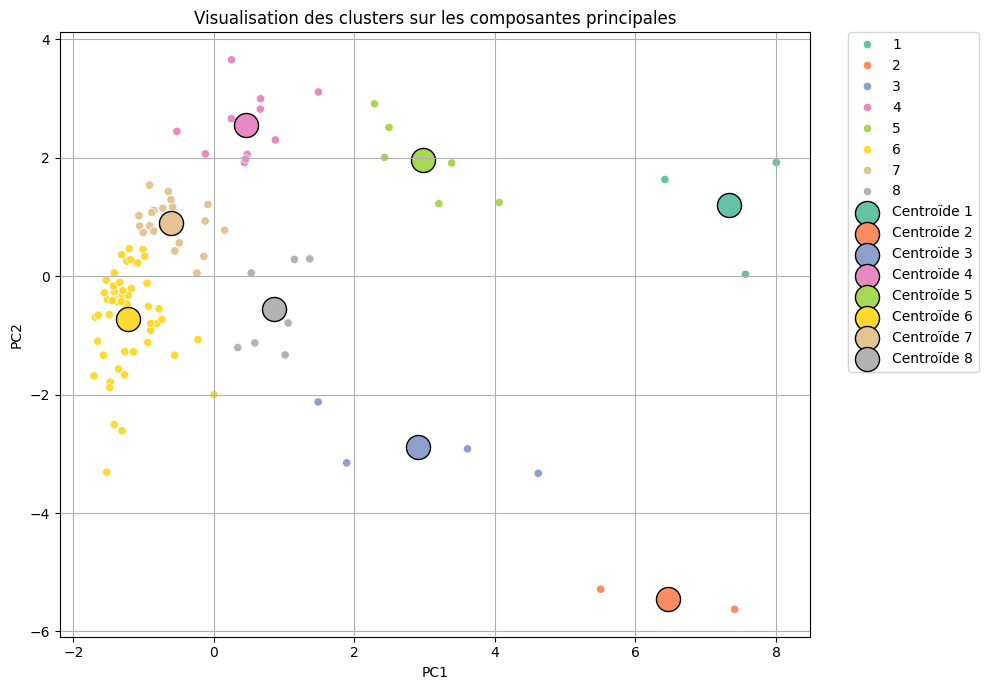

In [ ]:
# Calcul des centroïdes
centroids = pca_df.groupby('Cluster')[['PC1', 'PC2']].mean()

# Création du graphique
plt.figure(figsize=(10, 7))

# Utilisation de la même palette que seaborn
palette = sns.color_palette('Set2', n_colors=pca_df['Cluster'].nunique())

# Tracé des points des pays
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette=palette, legend='full')

# Tracé des centroïdes, avec même couleur que les clusters
for cluster_id, row in centroids.iterrows():
    plt.scatter(row['PC1'], row['PC2'],
                s=300, marker='o',
                color=palette[cluster_id - 1],  # Assure correspondance avec la palette
                edgecolor='black',
                label=f'Centroïde {cluster_id}')

plt.title('Visualisation des clusters sur les composantes principales')
plt.grid()

# Légende à droite
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


In [ ]:
# Score de silhouette

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = X_kmeans

# Choix des nombres de clusters à tester
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Nombre de clusters = {n_clusters} => Score de silhouette = {score:.4f}")


Nombre de clusters = 2 => Score de silhouette = 0.6631
Nombre de clusters = 3 => Score de silhouette = 0.4391
Nombre de clusters = 4 => Score de silhouette = 0.4475
Nombre de clusters = 5 => Score de silhouette = 0.4505
Nombre de clusters = 6 => Score de silhouette = 0.4498
Nombre de clusters = 7 => Score de silhouette = 0.3388
Nombre de clusters = 8 => Score de silhouette = 0.4678
Nombre de clusters = 9 => Score de silhouette = 0.4585
Nombre de clusters = 10 => Score de silhouette = 0.4637


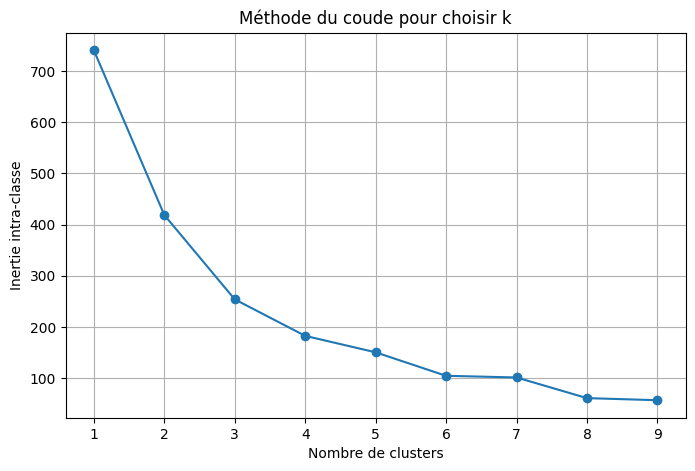

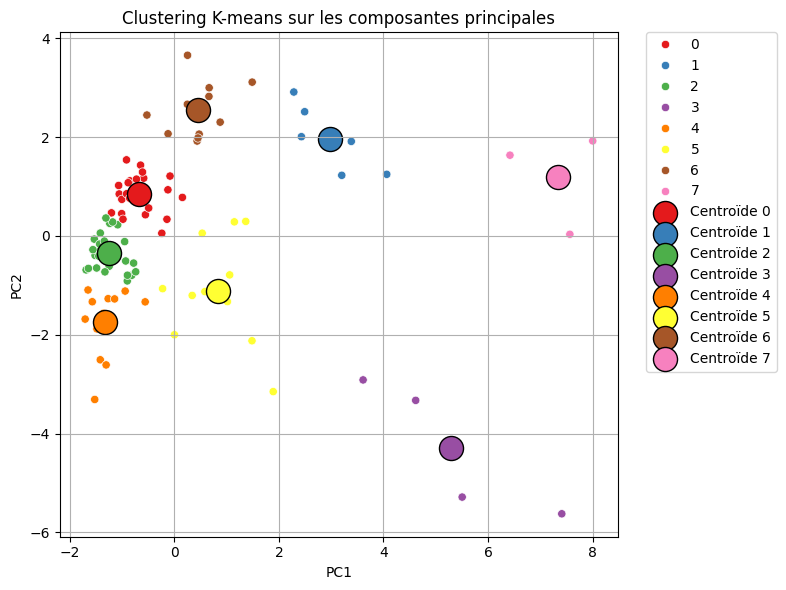

In [ ]:
# Réalisation d'un K-Means

## J'ai choisi 8 clusters car :
  # Je voulais des clusters suffisamment réduit en nombre de pays
  # J'ai observé un coude à 8 clusters
  # J'ai observé un score de silhouette plus important à 8 clusters (dans les nombres assez élevés de cluster)


from sklearn.cluster import KMeans

X_kmeans = X_pca[:, :2]
kmeans = KMeans(n_clusters=8, random_state=0)
clusters = kmeans.fit_predict(X_kmeans)
df['Cluster_KMeans'] = clusters

inertias = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_kmeans)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertias, marker='o')
plt.title("Méthode du coude pour choisir k")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie intra-classe")
plt.grid(True)
plt.show()


pca_df = pd.DataFrame(X_kmeans, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters
pca_df['Pays'] = df['Pays'].values


# Calcul des centroïdes (moyenne PC1, PC2 par cluster)
centroids = pca_df.groupby('Cluster')[['PC1', 'PC2']].mean()

# Palette cohérente
palette = sns.color_palette('Set1', n_colors=pca_df['Cluster'].nunique())

plt.figure(figsize=(8, 6))

# Tracé des points des pays
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette=palette, legend='full')

# Tracé des centroïdes avec les bonnes couleurs
for cluster_id, row in centroids.iterrows():
    plt.scatter(row['PC1'], row['PC2'],
                s=300, marker='o',
                color=palette[cluster_id],  # -1 car cluster_id commence à 1
                edgecolor='black',
                label=f'Centroïde {cluster_id}')

plt.title('Clustering K-means sur les composantes principales')
plt.grid()

# Légende à droite
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()



In [ ]:
grouped = df.groupby('Cluster_KMeans')['Pays'].apply(list)
for cluster_id, pays_liste in grouped.items():
    print(f"\nCluster {cluster_id} :")
    for pays in pays_liste:
        print("  -", pays)


Cluster 0 :
  - Antigua-et-Barbuda
  - Bahreïn
  - Botswana
  - Bulgarie
  - Chili
  - Chypre
  - Costa Rica
  - Croatie
  - Estonie
  - Grèce
  - Hongrie
  - Israël
  - Koweït
  - Lettonie
  - Lituanie
  - Malte
  - Namibie
  - Oman
  - Panama
  - Portugal
  - Roumanie
  - Slovénie
  - Uruguay

Cluster 1 :
  - Australie
  - Belgique
  - Canada
  - Espagne
  - Italie
  - Pays-Bas

Cluster 2 :
  - Albanie
  - Arménie
  - Bosnie-Herzégovine
  - Bénin
  - Cambodge
  - Djibouti
  - Fidji
  - Gabon
  - Ghana
  - Grenade
  - Guatemala
  - Guinée
  - Guinée-Bissau
  - Guyana
  - Géorgie
  - Honduras
  - Jamaïque
  - Kazakhstan
  - Macédoine du Nord
  - Maurice
  - Mauritanie
  - Mongolie
  - Monténégro
  - Nicaragua
  - Ouzbékistan
  - Papouasie-Nouvelle-Guinée
  - Paraguay
  - Rwanda
  - République dominicaine
  - Sri Lanka
  - Tadjikistan
  - Trinité-et-Tobago
  - Îles Salomon

Cluster 3 :
  - Brésil
  - Indonésie
  - Mexique
  - Russie

Cluster 4 :
  - Afghanistan
  - Algérie
  - Angola
 

In [ ]:
from sklearn.metrics import silhouette_score
scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append((n_clusters, score))
    print(f"Clusters = {n_clusters} => Score = {score:.4f}")

Clusters = 2 => Score = 0.6631
Clusters = 3 => Score = 0.4391
Clusters = 4 => Score = 0.4475
Clusters = 5 => Score = 0.4505
Clusters = 6 => Score = 0.4498
Clusters = 7 => Score = 0.3388
Clusters = 8 => Score = 0.4678
Clusters = 9 => Score = 0.4585
Clusters = 10 => Score = 0.4637


In [ ]:
# L'idéal serait donc 2 Cluster selon le score de Silhouette. Mais 2 Clusters ne va pas beaucoup m'avancer pour identifier un petit groupe de pays à identifier.
# Je vais donc prendre 8 Clusters (Coude +  nombre de cluster assez important pour avoir un groupe de pays assez réduit)

In [ ]:
grouped = df.groupby('Cluster_KMeans')['Pays'].apply(list)
for cluster_id, pays_liste in grouped.items():
    print(f"\nCluster {cluster_id} :")
    for pays in pays_liste:
        print("  -", pays)


Cluster 0 :
  - Antigua-et-Barbuda
  - Bahreïn
  - Botswana
  - Bulgarie
  - Chili
  - Chypre
  - Costa Rica
  - Croatie
  - Estonie
  - Grèce
  - Hongrie
  - Israël
  - Koweït
  - Lettonie
  - Lituanie
  - Malte
  - Namibie
  - Oman
  - Panama
  - Portugal
  - Roumanie
  - Slovénie
  - Uruguay

Cluster 1 :
  - Australie
  - Belgique
  - Canada
  - Espagne
  - Italie
  - Pays-Bas

Cluster 2 :
  - Albanie
  - Arménie
  - Bosnie-Herzégovine
  - Bénin
  - Cambodge
  - Djibouti
  - Fidji
  - Gabon
  - Ghana
  - Grenade
  - Guatemala
  - Guinée
  - Guinée-Bissau
  - Guyana
  - Géorgie
  - Honduras
  - Jamaïque
  - Kazakhstan
  - Macédoine du Nord
  - Maurice
  - Mauritanie
  - Mongolie
  - Monténégro
  - Nicaragua
  - Ouzbékistan
  - Papouasie-Nouvelle-Guinée
  - Paraguay
  - Rwanda
  - République dominicaine
  - Sri Lanka
  - Tadjikistan
  - Trinité-et-Tobago
  - Îles Salomon

Cluster 3 :
  - Brésil
  - Indonésie
  - Mexique
  - Russie

Cluster 4 :
  - Afghanistan
  - Algérie
  - Angola
 

In [ ]:
grouped.reset_index()
display(grouped)

,Pays
Cluster_KMeans,
0,"[Antigua-et-Barbuda, Bahreïn, Botswana, Bulgar..."
1,"[Australie, Belgique, Canada, Espagne, Italie,..."
2,"[Albanie, Arménie, Bosnie-Herzégovine, Bénin, ..."
3,"[Brésil, Indonésie, Mexique, Russie]"
4,"[Afghanistan, Algérie, Angola, Burkina Faso, C..."
5,"[Afrique du Sud, Arabie saoudite, Argentine, B..."
6,"[Autriche, Danemark, Finlande, Irlande, Island..."
7,"[Allemagne, Japon, Royaume-Uni]"


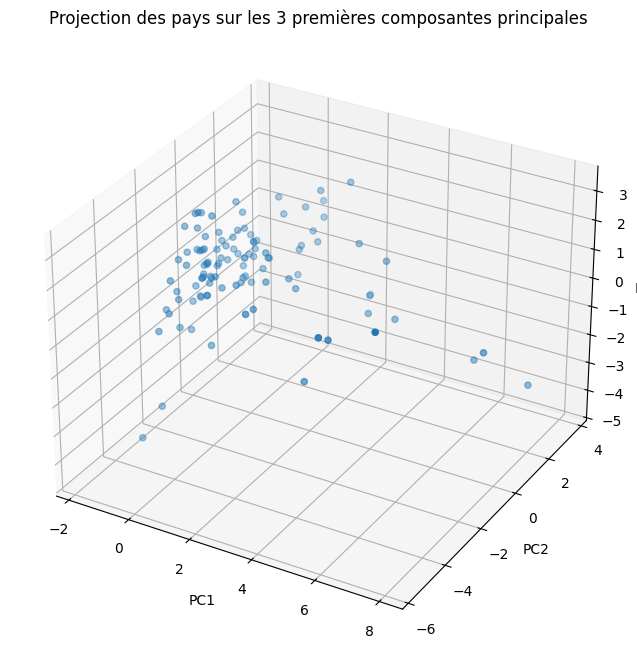

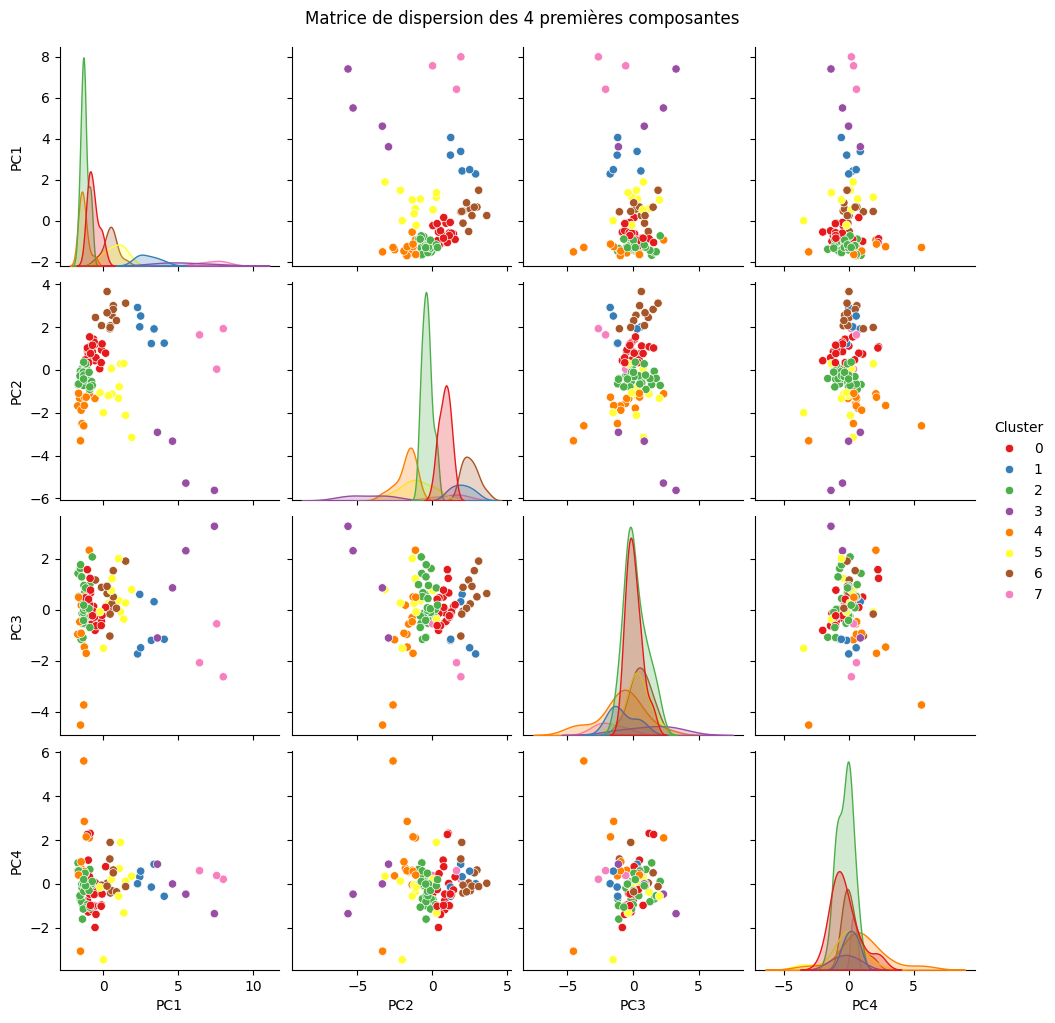

In [ ]:
X_pca_4b = X_pca[:, :4]

pca_df_4b = pd.DataFrame(X_pca_4b, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df_4b['Pays'] = df['Pays'].values

pca_df_4b = pca_df_4b.merge(pca_df[['Pays', 'Cluster']], on='Pays', how='left')


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_4b['PC1'], pca_df_4b['PC2'], pca_df_4b['PC3'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Projection des pays sur les 3 premières composantes principales')
plt.show()

palette = sns.color_palette("Set1", 8)
sns.pairplot(pca_df_4b, vars=['PC1', 'PC2', 'PC3', 'PC4'], hue='Cluster', palette=palette)
plt.suptitle("Matrice de dispersion des 4 premières composantes", y=1.02)
plt.show()

In [ ]:
display(df.head())

,Pays,prod_viande_2022(t),import_viande_2022(t),Import_viande_from_france_$_2022,pop_2022,pop_2023,Taxes_imp,stab_politique,PIB_2022,PIB_2023,performance_logistique_2022,croissance_PIB,croissance_pop,PIB_par_habitant,Cluster,Cluster_KMeans
0,Afghanistan,28790.74,6902.31,1.680464e+07,40578842.0,41454761.0,0.000000,-2.484081,1.449724e+10,1.723305e+10,2.0,0.188712,0.021586,415.707417,6,4
1,Afrique du Sud,1951000.00,290742.62,1.849396e+08,62378410.0,63212384.0,0.803496,-0.665642,4.069200e+11,3.806993e+11,3.8,-0.064437,0.013370,6022.542542,8,5
2,Albanie,16335.57,43124.46,2.746071e+07,2777689.0,2745972.0,0.000000,0.183349,1.901724e+10,2.354718e+10,2.3,0.238202,-0.011418,8575.171134,6,2
3,Algérie,274862.81,0.00,1.791302e+08,45477389.0,46164219.0,0.000000,-0.577885,2.256385e+11,2.476262e+11,2.2,0.097447,0.015103,5364.027950,6,4
4,Allemagne,1076000.00,494001.70,4.061486e+09,83797985.0,83280000.0,0.000000,0.586989,4.163596e+12,4.525704e+12,4.2,0.086970,-0.006181,54343.226508,1,7


In [ ]:
df_statdesc = df.groupby('Cluster_KMeans').describe()
display(df_statdesc)

prod_viande_2022(t)                                          \
                             count          mean           std         min   
Cluster_KMeans                                                               
0                             23.0  1.551149e+05  1.963766e+05       88.31   
1                              6.0  1.063781e+06  3.732218e+05   442020.00   
2                             33.0  1.542492e+05  4.401157e+05        0.00   
3                              4.0  6.913731e+06  5.117160e+06  3781735.28   
4                             14.0  8.049359e+04  7.414520e+04     4018.26   
5                             11.0  1.596839e+06  5.904819e+05   221317.69   
6                             12.0  1.043048e+05  6.842335e+04        0.00   
7                              3.0  1.754214e+06  6.499568e+05  1076000.00   

                                                                    \
                        25%          50%          75%          max   
Cluster_KMeans                                                       
0                 17404.885    68440.000   234238.765    692847.28   
1                896465.000  1171970.000  1358926.250   1370850.00   
2                  4141.970    24000.000   139858.000   2525379.00   
3               3976175.570  4674595.000  7612150.750  14524000.00   
4                 28529.950    59921.915   120298.500    274862.81   
5               1322511.160  1801776.290  1894293.900   2319000.00   
6                 45847.500   118959.500   146480.000    218803.00   
7               1445500.000  1815000.000  2093321.500   2371643.00   

               import_viande_2022(t)                                           \
                               count           mean            std        min   
Cluster_KMeans                                                                  
0                               23.0   43882.366957   44494.514120       0.00   
1                                6.0  197140.216667  217965.260901      83.08   
2                               33.0   37301.541515   52180.297605      57.85   
3                                4.0  275468.605000  515125.883901       9.27   
4                               14.0  423998.825000  810640.467418       0.00   
5                               11.0  147839.630000  165944.384245     929.33   
6                               12.0  168418.831667  332915.901415  -79104.00   
7                                3.0  504494.870000   65401.680968  444974.18   

                                                                  \
                        25%         50%          75%         max   
Cluster_KMeans                                                     
0                12318.4800   28969.230   62980.4800   153699.72   
1                95690.2825  134035.005  192841.6100   619335.69   
2                 4137.2900   12222.010   49966.6900   235394.58   
3                 3618.3150   27217.210  299067.5000  1047430.73   
4                  503.8075   13276.340  257156.1875  2690560.00   
5                38076.9100   71069.880  233549.6750   513695.66   
6                 7120.8025   51177.265   90299.2500  1067818.00   
7               469487.9400  494001.700  534255.2150   574508.73   

               Import_viande_from_france_$_2022                              \
                                          count          mean           std   
Cluster_KMeans                                                                
0                                          23.0  8.630365e+07  1.054300e+08   
1                                           6.0  2.157595e+09  1.287386e+09   
2                                          33.0  1.704782e+07  1.987143e+07   
3                                           4.0  1.410344e+08  6.847457e+07   
4                                          14.0  3.913655e+07  4.727382e+07   
5                                          11.0  1.395996e+08  1.900321e+08   
6                                

In [ ]:
df_mean = df.groupby('Cluster_KMeans')[['prod_viande_2022(t)','import_viande_2022(t)','Import_viande_from_france_$_2022','pop_2022','pop_2023','Taxes_imp','stab_politique','PIB_2022','PIB_2023','performance_logistique_2022','croissance_PIB','croissance_pop','PIB_par_habitant']].agg(['mean'])
pd.set_option('display.max_columns', None)
display(df_mean)

,prod_viande_2022(t),import_viande_2022(t),Import_viande_from_france_$_2022,pop_2022,pop_2023,Taxes_imp,stab_politique,PIB_2022,PIB_2023,performance_logistique_2022,croissance_PIB,croissance_pop,PIB_par_habitant
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster_KMeans,,,,,,,,,,,,,
0,1.551149e+05,43882.366957,8.630365e+07,5.580383e+06,5.628844e+06,2.571039,0.479934,1.212455e+11,1.312978e+11,3.300000,0.089710,0.013483,24089.691243
1,1.063781e+06,197140.216667,2.157595e+09,3.351791e+07,3.396044e+07,1.240146,0.612038,1.506969e+12,1.598451e+12,4.033333,0.069481,0.014275,51672.890278
2,1.542492e+05,37301.541515,1.704782e+07,8.472500e+06,8.598858e+06,9.852368,-0.059422,3.450204e+10,3.817769e+10,2.630303,0.108069,0.011108,6485.682942
3,6.913731e+06,275468.605000,1.410344e+08,1.904967e+08,1.914742e+08,8.431287,-0.644509,1.750336e+12,1.838843e+12,2.950000,0.066740,0.004585,10753.956117
4,8.049359e+04,423998.825000,3.913655e+07,2.439375e+07,2.491960e+07,7.141863,-1.628418,4.359495e+10,4.913423e+10,2.242857,0.136836,0.020828,1884.291263
5,1.596839e+06,147839.630000,1.395996e+08,6.298414e+07,6.325354e+07,6.542246,-0.427474,4.877667e+11,5.002407e+11,3.181818,0.034181,0.001852,10806.276279
6,1.043048e+05,168418.831667,3.500807e+08,5.772706e+06,5.861434e+06,5.255102,0.934607,3.991806e+11,4.014421e+11,3.933333,0.012675,0.015798,75845.008951
7,1.754214e+06,504494.870000,3.226778e+09,9.223799e+07,9.204888e+07,2.475392,0.684354,3.844683e+12,4.037018e+12,4.000000,0.053484,-0.000932,45857.869599


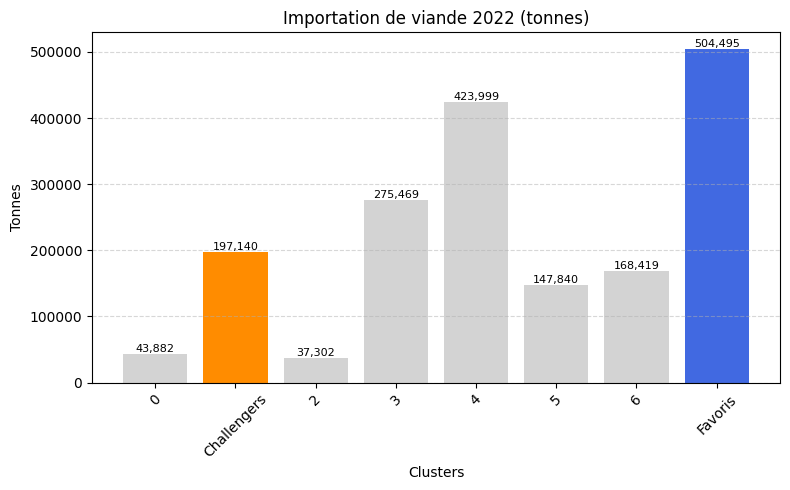

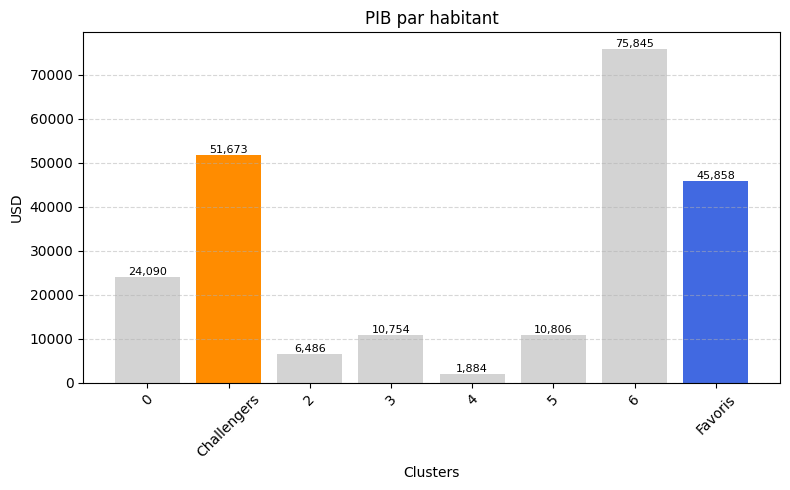

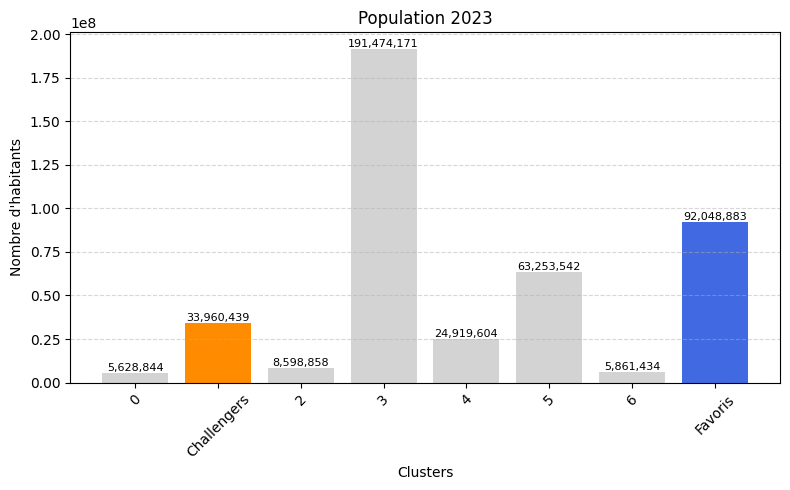

In [ ]:
import matplotlib.pyplot as plt

# Supprimer le niveau 'mean' dans les colonnes
df_mean_simplified = df_mean.droplevel(1, axis=1).copy()

# Convertir l'index en chaîne pour éviter les problèmes de mélange de types
df_mean_simplified.index = df_mean_simplified.index.astype(str)

# Créer un mapping pour renommer
rename_dict = {'7': "Favoris", '1': "Challengers"}
df_mean_simplified.rename(index=rename_dict, inplace=True)

# Générer la liste de couleurs en fonction des nouveaux noms
colors = []
for cluster in df_mean_simplified.index:
    if cluster == "Favoris":
        colors.append('royalblue')
    elif cluster == "Challengers":
        colors.append('darkorange')
    else:
        colors.append('lightgray')

# Fonction d'affichage avec affichage des valeurs sur les barres
def plot_variable(var, title, ylabel):
    plt.figure(figsize=(8, 5))
    bars = plt.bar(df_mean_simplified.index, df_mean_simplified[var], color=colors)
    plt.title(title)
    plt.xlabel("Clusters")
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Afficher la valeur au-dessus des barres
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height,
                 f'{height:,.0f}', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

# Tracer les 3 graphiques
plot_variable('import_viande_2022(t)', "Importation de viande 2022 (tonnes)", "Tonnes")
plot_variable('PIB_par_habitant', "PIB par habitant", "USD")
plot_variable('pop_2023', "Population 2023", "Nombre d'habitants")
